<a href="https://colab.research.google.com/github/Knxd3/CE888/blob/main/Lab3/Bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score as f1
from sklearn.metrics import SCORERS
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix, scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [63]:
bank0 = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter = ';')
bank1 = bank0.copy()
del bank1['duration']
#bank1 = pd.get_dummies(bank1)
features = bank1.columns[0:len(bank1.columns)-1]
bank1.dropna(inplace=True)
outcome = bank1.columns[len(bank1.columns)-1]
bank1 = bank1.apply(LabelEncoder().fit_transform)

bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,0,26,0,1,8,18,16,287,8,0


ratio yes to no:  11.27


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


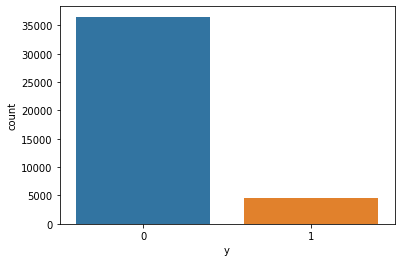

In [64]:
#imbalance
sns.countplot(bank1['y'])

imb = bank1['y'].value_counts()
print ('ratio yes to no: ', round(imb[1]/(imb[0]+imb[1])*100,2))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(bank1.loc[0:, features], bank1[outcome], test_size = 0.2, random_state = 50, stratify = bank1[outcome])

k=0

for key in y_train:
  if key == 1 or key == '1':
    k=k+1
# print(k)
print(k/len(y_train))

k=0

for key in y_test:
  if key == 1 or key == '1':
    k=k+1
# k
k/len(y_test)



0.11265553869499241


0.11264870114105366

Training/test split error, no parameter tuning

In [5]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 3)

model.fit(X_train, y_train)

metrics.f1_score(y_test, model.predict(X_test))


0.2995744680851064

Cross validated model

In [6]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 3)

scores = cross_val_score(model, X_train, y = y_train, scoring = make_scorer(metrics.f1_score), cv=10)

scores

array([0.24070022, 0.30603448, 0.24      , 0.2832244 , 0.23451327,
       0.2987013 , 0.37938144, 0.25550661, 0.25991189, 0.26349892])

Compared to dummy

In [7]:
dummy = DummyClassifier(strategy='stratified')

dummy.fit(X_train, y_train)

dummy_results = dummy.predict(X_test)

print(f1(y_test,dummy_results))

scores.mean()

0.10853530031612225


0.27614725410740487

Finding best parameters

In [8]:
# start = time.time()
# params = {'n_estimators': [x for x in range(100, 1001, 100)],
#           'max_depth': [x for x in range(6,18)]}
# gr_model = GridSearchCV(RandomForestClassifier(), params, cv=10, n_jobs = -1, scoring = make_scorer(metrics.f1_score))

# gr_model.fit(X_train, y_train)
# end = time.time()

# print(end-start)

# 2268.2770524024963

# gr_model.best_estimator_

# RandomForestClassifier(max_depth=17, n_estimators=700)

# gr_model

# GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
#              param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
#                                        17],
#                          'n_estimators': [100, 200, 300, 400, 500, 600, 700,
#                                           800, 900, 1000]},
#              scoring=make_scorer(f1_score))

Fitting and feature importances

In [83]:
gr_model = RandomForestClassifier(n_estimators = 200, max_depth = 12)
gr_model.fit(X_train, y_train)

importances = gr_model.feature_importances_
indices = np.argsort(importances)[::-1]

bank1.columns[indices[0:3]]

Index(['euribor3m', 'nr.employed', 'pdays'], dtype='object')

Generalisation error

In [10]:
scores = gr_model.predict(X_test)

metrics.f1_score(y_test, scores)

0.3982808022922636

Lab Quiz

In [11]:
len(bank1.columns)

bank0.shape

bank0.dropna()

bank0.shape

metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(bank1.loc[0:, features], bank1[outcome], test_size = 0.2, random_state = 50)

model = RandomForestClassifier(n_estimators = 200, max_depth = 8)

scores = cross_val_score(model, X_train, y_train, cv = 10, n_jobs=-1, scoring = make_scorer(f1))

print(scores)

round(scores.mean(),2)

[0.34583333 0.30737705 0.34710744 0.34693878 0.32220039 0.32786885
 0.33402923 0.3499006  0.31422505 0.33954451]


0.33

In [82]:
model = RandomForestClassifier(n_estimators = 250, max_depth = 6)

scores = cross_val_score(model, X_train, y_train, cv = 10, n_jobs=-1, scoring = make_scorer(f1))

round(scores.mean(),2)

0.31

In [80]:
model = RandomForestClassifier(n_estimators = 200, max_depth = 10, random_state = 60)

model.fit(X_train, y_train)

scores = model.predict(X_test)

round(f1(y_test, scores),2)

0.36

In [76]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33479,15,1,1,2,1,0,0,0,6,3,1,26,0,1,3,8,4,209,6
36397,14,4,1,6,0,0,0,0,4,3,0,26,0,1,2,9,9,202,5
10925,11,4,2,2,0,0,0,1,4,4,1,26,0,1,9,23,8,306,10
8877,24,4,1,6,0,0,0,1,4,2,0,26,0,1,9,23,8,293,10
32199,27,7,2,3,0,0,0,0,6,0,0,26,1,0,3,8,4,211,6
